<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/lab3_PI_fbb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u


%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [0]:
def square(l, ax):
  '''plots a square with side 2l'''
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')
  

In [0]:
def circle(l, ax):
  '''plots a circle with radius l'''
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')
  ax.set_xlabel("x [m]")
  ax.set_ylabel("y [m]")
  

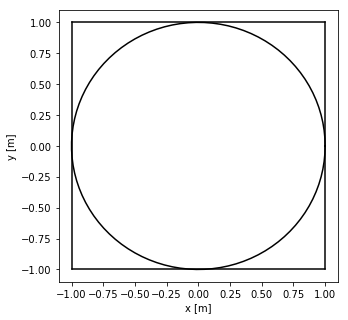

In [24]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)


###Figure 1: Plot of a square and inscribed circle. Square has a radius of 2 m and circle has diameter 2 m.

In [0]:
def isin(x, y, l):
  '''checks if a point (x,y) lies within the radius of l'''
  return np.sqrt(x**2 + y**2) < l 

Sample size: 10 Pi: 3.20


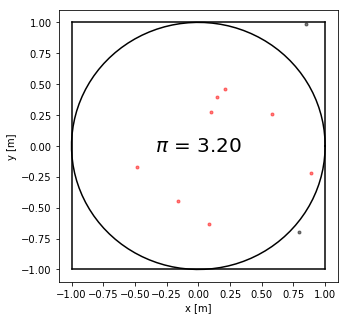

Sample size: 50 Pi: 3.76


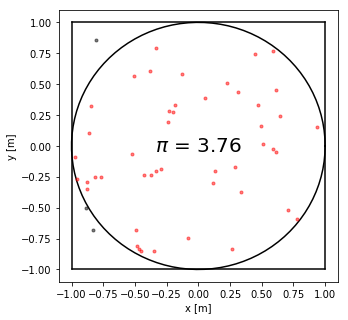

Sample size: 100 Pi: 3.00


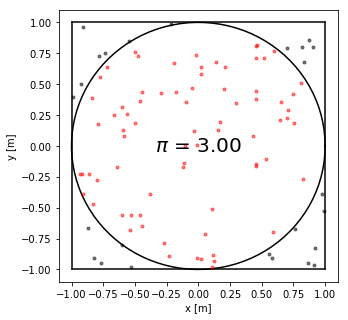

Sample size: 500 Pi: 3.19


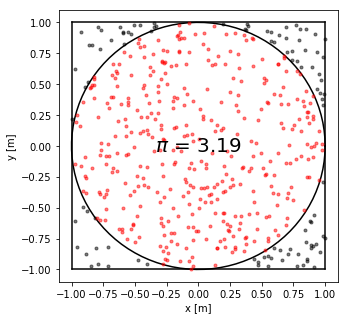

Sample size: 1000 Pi: 3.15


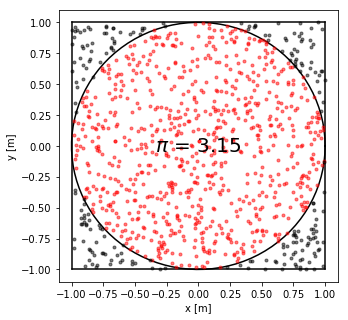

Sample size: 5000 Pi: 3.13


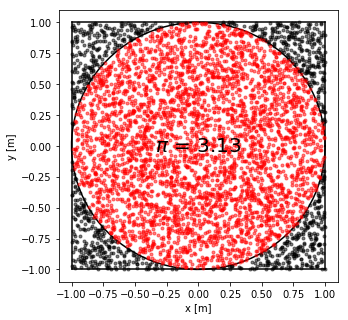

Sample size: 10000 Pi: 3.13


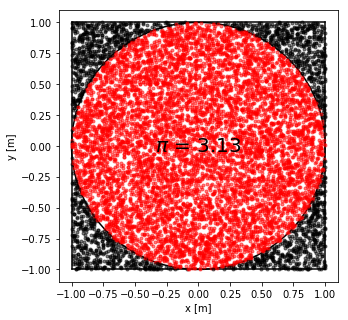

In [40]:
np.random.randn(123)
pis = {}
for N in [10, 50, 100, 500, 1000, 5000, 10000]:
  fig, ax = pl.subplots(figsize=(5, 5))
  square(1, ax=ax)
  circle(1, ax=ax)
  inner = 0

  for i in range(N):
    x = np.random.rand() * 2 - 1
    y = np.random.rand() * 2 - 1
    if isin(x, y, 1):
      inner += 1
      color = 'r'
    else: 
      color = 'k'
    ax.plot(x, y, '.', c=color, alpha=0.5)
  pl.text(0, 0, r"$\pi$ = {:.2f}".format(4 * inner / N), 
          fontsize=20, va="center", ha="center")
  pis[N] = 4 * inner / N
  print("Sample size: {}".format(N), "Pi: {:.2f}".format(pis[N]))
  pl.show()

###Figure 2: Randomly distributed points inside and outside of circle. Sample sizes are 10, 50, 100, 500, 1000, 5000, 10000 respectively. As sample size is increased, the value of $\pi$ converges to a value very close to the actual value.

Text(9000, 3.141592653589793, '$\\pi$')

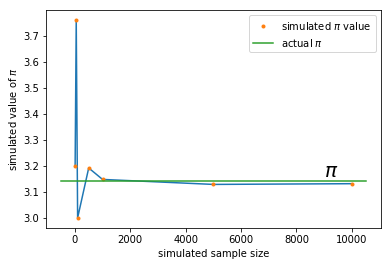

In [42]:
pl.plot(pis.keys(), pis.values())
pl.plot(pis.keys(), pis.values(), '.',label='simulated $\pi$ value')
pl.xlabel("simulated sample size")
pl.ylabel("simulated value of $\pi$")
#pl.ylim(2.2,3.6)
pl.plot(pl.xlim(), [np.pi] * 2, label='actual $\pi$')
pl.legend(loc="upper right")



pl.text(9000, np.pi, r"$\pi$", va="bottom", fontsize=20)


### Figure 3: Simulated value of $\pi$ plotted against sample size. When sample size is small, simulated estimate of $\pi$ fluctuates a lot, but when sample size is large enough, it gets resonably close to the actual value. 